## <a> Motivação </a>

Todo trabalho de Ciência de Dados passa por essa importante etapa. Conhecer bem os dados, saber as distribuições, medidas estatísticas principais, visualizar correlações e evoluções é essencial para gerar insights e solucionar problemas.

Essa etapa é bem *híbrida* no sentido em que pode ser utilizada sem um objetivo completamente definido, numa busca por informações e insights. De outro lado, num projeto com objetivo de negócio bem definido (fase 1 do CRISP-DM), ela é bem focalizada nas perguntas de negócio que queremos responder.

## <a> Objeto de Estudo </a>

Vamos trabalhar com informações de microdados no ENEM realizado em 2019. De acordo com o site do [INEP](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem), o ENEM tem o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. As notas do Enem podem ser usadas para acesso ao Sistema de Seleção Unificada (Sisu) e ao Programa Universidade para Todos (ProUni). Elas também são aceitas em mais de 50 instituições de educação superior portuguesas. Além disso, os participantes do Enem podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem possibilitam, ainda, o desenvolvimento de estudos e indicadores educacionais.[1](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem)

Conhecer bem os dados dos aplicantes para a prova pode fornecer insights preciosos para a educação brasileira. Para o presente estudo vamos avaliar se dados demográficos, indicadores sociais, de escolaridade dos pais e outras indicações tem correlações com as notas dos candidatos. Muitos insights e respostas podem ser obtidas somente com a análise exploratória de dados.

# Importando:

## Pacotes:

In [298]:
# Bibliotecas: Leitura de Dados e Visualização.

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os 

%matplotlib inline

import plotly.express as px
from IPython.core.pylabtools import figsize
from string import ascii_uppercase

# Configuração - Pandas: Mostrar todas as linhas e colunas.

pd.set_option( 'display.max_rows' , None )
pd.set_option( 'display.max_columns' , None )

# Configuração - Pandas: Não mostrar notação científica.

pd.set_option( 'display.float_format' , lambda x: '%.2f' % x ) 

## Dados:

Usarei uma amostra de 10% dos dados ENEM / INEMP. Motivo: Recusos de Hardoware insuficiente para rodar base total. 

In [299]:
# Importando dados em CSV:

df_enem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto 01 - EAD/data/enem_2019.csv')

O tamanho do arquivo é grande. Por isso, convertir para Parquet.

In [300]:
# Conversão: CSV para Parquet. 

df = df_enem.to_parquet('/content/drive/MyDrive/Colab Notebooks/Projeto 01 - EAD/data/enem_2019.parquet')

__Resultado da conversão:__ Redução de 79,50% da base original.

In [301]:
# Importando dados em Parquet:

df = pd.read_parquet( '/content/drive/MyDrive/Colab Notebooks/Projeto 01 - EAD/data/enem_2019.parquet' )

# Análise Exploratória de Dados:

In [302]:
# Visualizando as 3 primeira linhas da base de dados:

df.head(3)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5089962,190005708034,2019,2305506,Iguatu,23,CE,22.00,F,1,3,1,2305506.00,Iguatu,23.00,CE,1,3,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2305506,Iguatu,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1,1968816,190003326900,2019,3548500,Santos,35,SP,19.00,F,1,1,1,3548500.00,Santos,35.00,SP,1,1,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3548500,Santos,35,SP,1,1,1,1,503.00,508.00,512.00,515.00,543.90,527.70,545.30,513.90,ACDDCEDEDCCBCBBBBAACECADABAEBBDEEACCECBBCBDDC,ACAABDBEEAABDCCAACBEEDCBDEDBBCCCBCEBDDCABCCBB,BBEEA99999DEEBECBBCACDEAABEEBBECEBAAEDCBECADCE...,EBBADECCAEBBCDECCAEBCABDBCDEBBADBDCABAEBDCCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
2,3432726,190004261548,2019,3552106,Socorro,35,SP,16.00,F,1,1,1,3552106.00,Socorro,35.00,SP,3,0,1,NaN,1,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552106,Socorro,35,SP,1,1,1,1,504.00,509.00,514.00,516.00,406.10,521.20,549.20,510.50,ADCAEDAEADACDCBACEDEABCEBBAEBABBACEEDEACAABCD,ADACCCACDBAABBBDBAEABCCEACAABDEBAECAEDAEDAACE,99999ABCABBAEBCDEDEBDAADCEDCDECBDBDBBECAEDCCBC...,BECACAABACBCABCACDACBDCCDACAAEBCECAECEBCAECEE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B


In [303]:
# Resetando e Renomeado Index:

df = df.reset_index( drop = True )
df.rename(columns={'Unnamed: 0': 'INDEX'}, inplace = True)

In [304]:
print( "Linhas:" , df_enem.shape[0] ) 
print( "Colunas:" , df_enem.shape[1] )

Linhas: 509527
Colunas: 137


In [305]:
print("Dados do Ano:", df['NU_ANO'].unique())

Dados do Ano: [2019]


In [306]:
# Visualização dos Tipos de Dados:

df.dtypes

INDEX                            int64
NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                

## Remoção de Colunas:

Temos colunas que não são importantes para nossa análise. 

Então, removerei algumas colunas para economizar memória e ganhar velocidade de processamento. 

In [307]:
colunas_questão = [coluna for coluna in df.columns if coluna.startswith( 'TX_' ) ] 
colunas_codigos = [ coluna for coluna in df.columns if coluna.startswith( 'CO_' ) ]
colunas_municipios = [ coluna for coluna in df.columns if 'MUNICIPIO' in coluna]

outras_colunas =  ['NU_ANO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO', 'IN_TREINEIRO', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 
                  'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 
                  'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 
                  'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA','IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_MAQUINA_BRAILE', 'IN_SOROBAN',
                  'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL', 'SG_UF_PROVA', 
                  'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT','TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5']

colunas_remover = colunas_questão + colunas_codigos + colunas_municipios + outras_colunas

In [308]:
df = df.drop( colunas_remover , axis= 1 ) 

Foram reduzidos 40,14% das colunas.

## Estatítica Descritiva:

In [309]:
df.describe()

,INDEX,NU_INSCRICAO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
count,509527.00,509527.00,509519.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,371475.00,392613.00,392613.00,371475.00,392613.00,509527.00
mean,2546050.54,190003550908.19,22.10,1.08,2.13,1.03,1.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,477.66,507.25,520.46,522.92,571.30,3.87
std,1470141.84,1471186.69,7.47,0.44,1.02,0.21,0.55,0.04,0.01,0.02,0.02,0.00,0.04,0.02,0.04,0.02,0.01,0.02,0.01,0.02,76.00,82.22,64.02,108.94,188.74,1.48
min,8.00,190001004657.00,12.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,1271267.00,190002276570.50,18.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,417.80,448.00,483.50,435.10,480.00,3.00
50%,2548061.00,190003552273.00,19.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,470.20,510.70,526.10,500.90,580.00,4.00
75%,3816330.00,190004822237.00,24.00,1.00,3.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,532.90,566.50,565.20,597.10,680.00,5.00
max,5095250.00,190006120178.00,86.00,4.00,5.00,4.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,860.90,811.90,801.70,985.00,1000.00,20.00


In [310]:
colunas_notas = [ coluna for coluna in df if 'NOTA' in coluna ]

colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

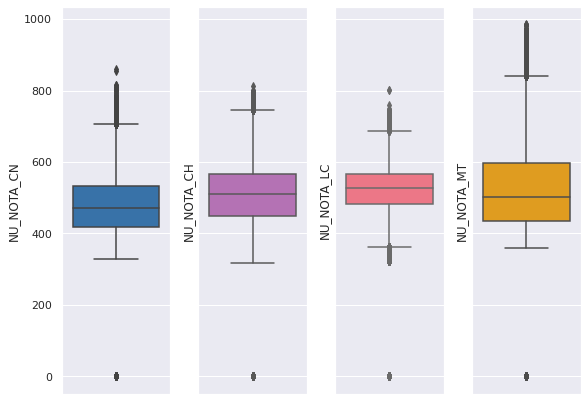

In [311]:
# Analisando as Notas:

sns.set_style( "darkgrid" ) 

figura, graficos = plt.subplots( 1 , 4 , sharey = True , figsize = ( 8 , 6 ) )

plt.tight_layout()

cores = [ '#2573bb','#bf67bf','#ff6479','#ffa600' ]

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot( data = df , y = coluna_1 , ax = graficos[i] , color=cores[i] )

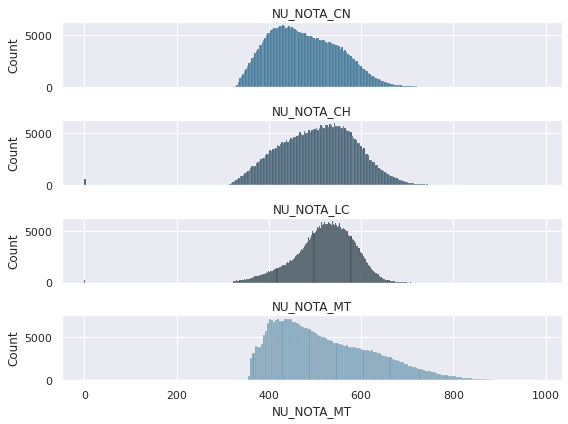

In [312]:
# Analisando as distribuições das notas:

sns.set_style( "darkgrid" )

figura, graficos = plt.subplots ( 4 , 1 , sharex = True , tight_layout=True, figsize = ( 8 , 6 ) )

cores = [ '#024873' , '#012840' ,'#011826' , '#5888A6' ]

plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot ( data = df[coluna_1] , ax = graficos[i] , color=cores[i] ).set_title( coluna_1 )

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

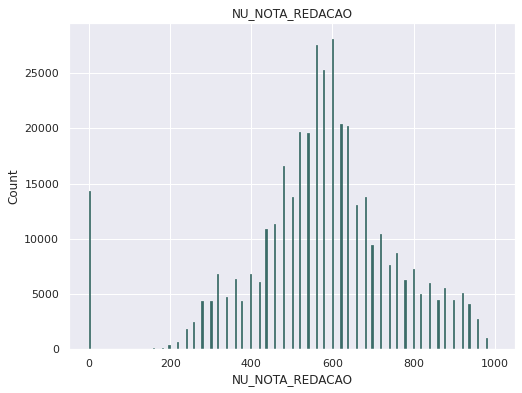

In [313]:
# Analisando a nota da redação:

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.histplot( data = df[ 'NU_NOTA_REDACAO' ] , color = '#01403A' ).set_title( 'NU_NOTA_REDACAO' ) 

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

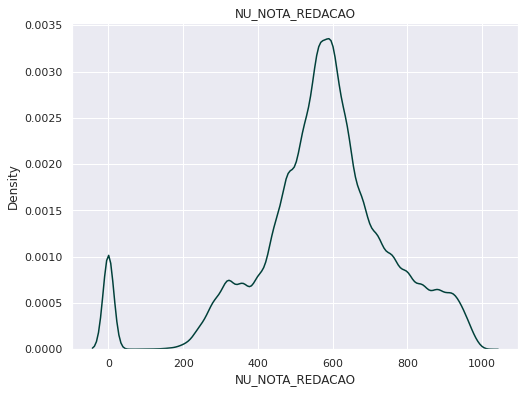

In [314]:
# Os dados do histograma de Redação está muito esparso. Por isso, usei o gráfico de densidade.

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.kdeplot( data = df[ 'NU_NOTA_REDACAO' ] , color = '#01403A' ).set_title( 'NU_NOTA_REDACAO' ) 

# Dados Demográficos:

In [315]:
# Analisando IDADE:

df[ 'NU_IDADE' ].value_counts().sort_index()

12.00        6
13.00       23
14.00      529
15.00     7824
16.00    31369
17.00    84619
18.00    86634
19.00    57786
20.00    41133
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
66.00       55
67.00       63
68.00       35
69.00       31
70.00       27
71.00       18
72.00       12
73.00        8
74.00       10
75.00        7
76.00        3
77.00        1
78.00     

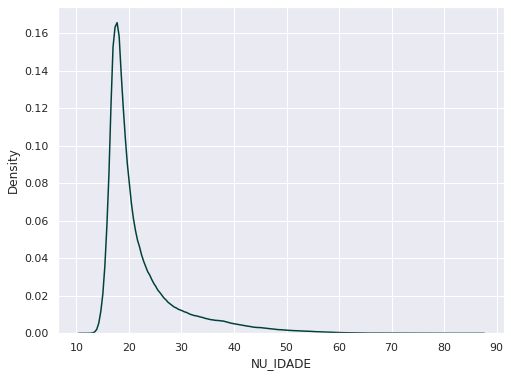

In [316]:
sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.kdeplot( data = df, x = 'NU_IDADE' , color = '#01403A' )

In [317]:
df[ 'TP_SEXO' ].value_counts()

F    303139
M    206388
Name: TP_SEXO, dtype: int64

In [318]:
df[ 'TP_SEXO' ].value_counts( normalize = True ) * 100

F   59.49
M   40.51
Name: TP_SEXO, dtype: float64

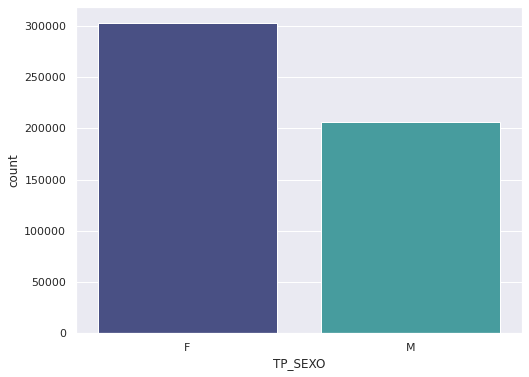

In [319]:
sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.countplot( data = df , x = 'TP_SEXO' , palette = 'mako' )

In [320]:
'''

0 Não informado
1 Solteiro(a)
2 Casado(a)/Mora com companheiro(a)
3 Divorciado(a)/Desquitado(a)/Separado(a)
4 Viúvo(a)

'''

df[ 'TP_ESTADO_CIVIL' ].value_counts().sort_index()

0     20345
1    439950
2     39834
3      8763
4       635
Name: TP_ESTADO_CIVIL, dtype: int64

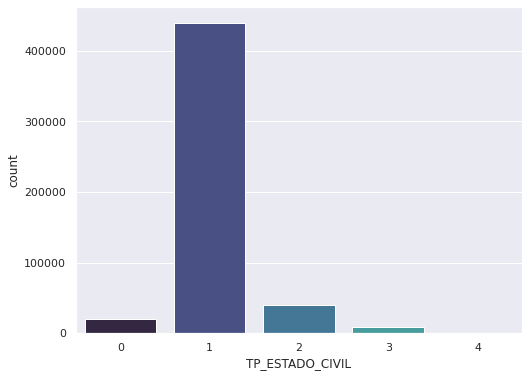

In [321]:
sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.countplot( data = df , x = 'TP_ESTADO_CIVIL' ,  palette = 'mako' )

In [322]:
'''

0 Não declarado
1 Branca
2 Preta
3 Parda
4 Amarela
5 Indígena

'''

df[ 'TP_COR_RACA' ].value_counts().sort_index()

0     10446
1    183179
2     64694
3    236369
4     11616
5      3223
Name: TP_COR_RACA, dtype: int64

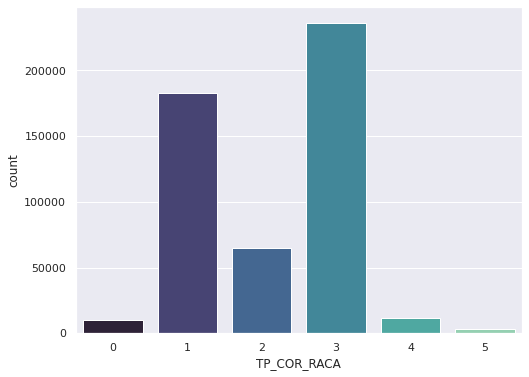

In [323]:
sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.countplot( data = df , x = 'TP_COR_RACA' ,  palette = 'mako' )

In [324]:
ufs = df ['SG_UF_RESIDENCIA' ].value_counts().sort_index()

ufs

AC     3955
AL     9283
AM    11737
AP     4319
BA    39880
CE    29581
DF     9485
ES    10239
GO    17074
MA    22157
MG    53702
MS     7057
MT     8757
PA    27861
PB    14891
PE    27051
PI    12134
PR    20829
RJ    34042
RN    11781
RO     5804
RR     1283
RS    21989
SC    10896
SE     7714
SP    81333
TO     4693
Name: SG_UF_RESIDENCIA, dtype: int64

In [325]:
df_ufs = pd.DataFrame( { 'UF' : ufs.index , 'CANDIDATOS' : ufs.values } )

df_ufs.head()

,UF,CANDIDATOS
0,AC,3955
1,AL,9283
2,AM,11737
3,AP,4319
4,BA,39880


In [326]:
fig = px.treemap( data_frame = df_ufs, path = ['UF'], values = 'CANDIDATOS' )

fig.update_traces( root_color = "lightgrey" )

fig.update_layout( margin = dict(t=50 , l=25, r=25, b=25) )

fig.show()

# Dados Socioeconômico:

In [327]:
# Escolaridade do Pai:

'''

A Nunca estudou.
B Não completou a 4ª série/5º ano do Ensino Fundamental.
C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E Completou o Ensino Médio, mas não completou a Faculdade.
F Completou a Faculdade, mas não completou a Pós-graduação.
G Completou a Pós-graduação.
H Não sei.

'''

df[ 'Q001' ].value_counts().sort_index()

A     29079
B    113489
C     72236
D     58789
E    130900
F     37494
G     22957
H     44583
Name: Q001, dtype: int64

In [328]:
# Não sabem a Escolaridade do Pai:

len( df.loc[ df[ 'Q001' ] == 'H' ] ) / df.shape[0] * 100

8.74987979047234

In [329]:
# Escolaridade do Mãe:

df[ 'Q002' ].value_counts().sort_index()

A     19580
B     85678
C     68403
D     67117
E    162963
F     51384
G     39806
H     14596
Name: Q002, dtype: int64

In [330]:
# Não sabem a Escolaridade do Pai:

len( df.loc[ df[ 'Q002' ] == 'H' ] ) / df.shape[0] * 100

2.8646175766936786

In [331]:
# Variáveis para delimitar pais que possuem nível superior:

df[ 'pai_possui_superior' ] = df[ 'Q001' ].isin( [ 'F' , 'G' ] )
df[ 'mae_possui_superior' ] = df[ 'Q002' ].isin( [ 'F' , 'G' ] )

df.head(1)

,INDEX,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,5089962,190005708034,CE,22.00,F,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B,False,False


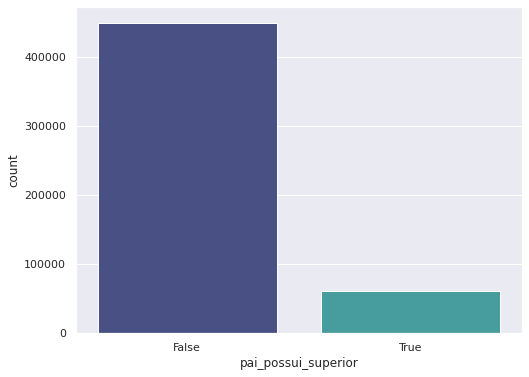

In [332]:
# Escolaridade do Pai (Superior):

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.countplot( data = df , x = 'pai_possui_superior' ,  palette = 'mako' )

In [333]:
# Escolaridade do Pai (Superior):

df[ 'pai_possui_superior' ].value_counts( normalize = True ) * 100

False   88.14
True    11.86
Name: pai_possui_superior, dtype: float64

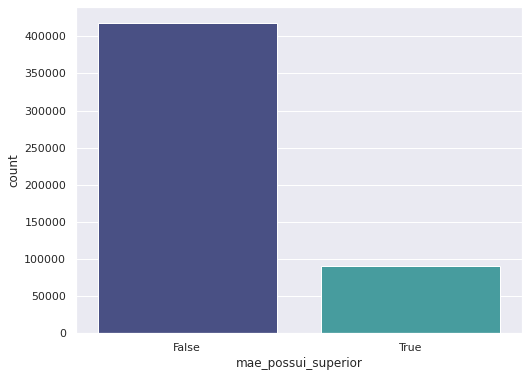

In [334]:
# Escolaridade do Mãe (Superior):

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.countplot( data = df , x = 'mae_possui_superior' , palette = 'mako' )

In [335]:
# Escolaridade do Mãe (Superior):

df[ 'mae_possui_superior' ].value_counts( normalize = True ) * 100

False   82.10
True    17.90
Name: mae_possui_superior, dtype: float64

In [336]:
# Analisar a renda familiar. Vamos transformar Q006 em algo numérico?

'''

A Nenhuma renda.
B Até R$ 998,00.
C De R$ 998,01 até R$ 1.497,00.
D De R$ 1.497,01 até R$ 1.996,00.
E De R$ 1.996,01 até R$ 2.495,00.
F De R$ 2.495,01 até R$ 2.994,00.
G De R$ 2.994,01 até R$ 3.992,00.
H De R$ 3.992,01 até R$ 4.990,00.
I De R$ 4.990,01 até R$ 5.988,00.
J De R$ 5.988,01 até R$ 6.986,00.
K De R$ 6.986,01 até R$ 7.984,00.
L De R$ 7.984,01 até R$ 8.982,00.
M De R$ 8.982,01 até R$ 9.980,00.
N De R$ 9.980,01 até R$ 11.976,00.
O De R$ 11.976,01 até R$ 14.970,00.
P De R$ 14.970,01 até R$ 19.960,00.
Q Mais de R$ 19.960,00.

'''

dicionario_renda = dict()

# Iterando sobre o alfabeto:

for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i

# Função de Mapeamento:

df[ 'renda_familiar' ] = df[ 'Q006' ].map(dicionario_renda)

df.head(1)

,INDEX,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior,renda_familiar
0,5089962,190005708034,CE,22.00,F,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B,False,False,1


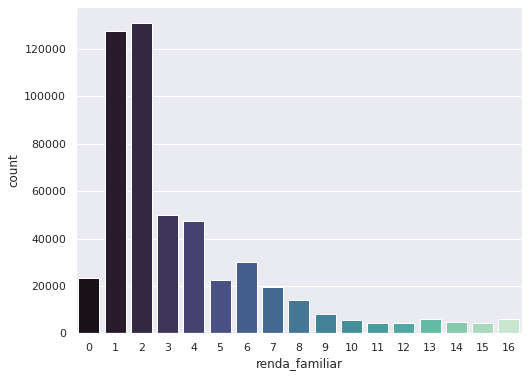

In [337]:
# Analise de Renda Familiar:

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.countplot( data = df , x = 'renda_familiar' ,  palette = 'mako' )

# Relação: Nota x Caracterísitcas:

Avaliar se as notas dos candidatos é diferente com relação a:



*  Sexo.
*  Raça.
* Atendimento Especial.
* Intruções: Mãe e Pai.
* Renda Mensal da Familia.

In [338]:
# Criando df com as notas e sexo dos candidatos:

df_sexo = df.loc[ : , colunas_notas + [ 'TP_SEXO' ] ]

df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,F
1,543.90,527.70,545.30,513.90,680.00,F
2,406.10,521.20,549.20,510.50,480.00,F
3,520.50,488.00,549.20,599.40,500.00,M
4,577.10,587.00,610.70,747.00,780.00,M


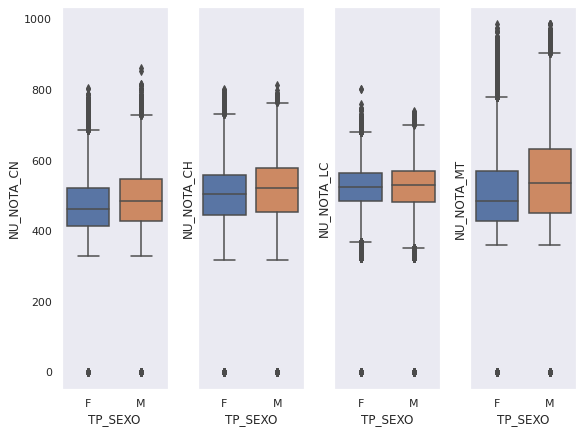

In [339]:
# Analisando as Notas x Sexo:

sns.set_style( 'dark' ) 

figura, graficos = plt.subplots( 1 , 4 , sharey = True , figsize = ( 8 , 6 ) )

plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot( data = df_sexo , y = coluna_1 , x = 'TP_SEXO' , ax = graficos[i] )

In [340]:
# Criando DF com as notas e raça:

df_raca = df.loc[ : , colunas_notas + [ 'TP_COR_RACA' ] ]

df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,3
1,543.90,527.70,545.30,513.90,680.00,1
2,406.10,521.20,549.20,510.50,480.00,1
3,520.50,488.00,549.20,599.40,500.00,1
4,577.10,587.00,610.70,747.00,780.00,1


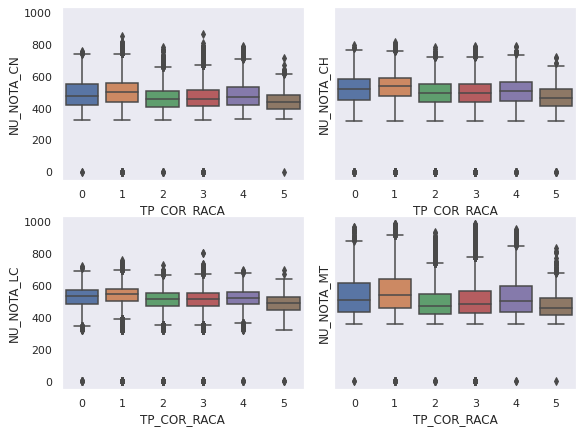

In [341]:
# Analisando as Notas x Raça:

sns.set_style( 'dark' ) 

figura, graficos = plt.subplots( 2 , 2 , sharey = True , figsize = ( 8 , 6 ) )

plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2]
    coluna_2 = colunas_notas[i*2+1]
    sns.boxplot( data = df_raca , y = coluna_1 , x = 'TP_COR_RACA' , ax = graficos[i][0] )
    sns.boxplot( data = df_raca , y = coluna_2 , x = 'TP_COR_RACA' , ax = graficos[i][1] )

In [342]:
# Calcular atendimetno especializado:

colunas_atendimento_especializado =['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
                                    'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
                                     'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

df_atendimento_especializado = df.loc[ : , colunas_notas ] 
df_atendimento_especializado[ 'atendimento_especializado' ] = df.loc[ : , colunas_atendimento_especializado].sum( axis = 1 ) > 0
df_atendimento_especializado.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,atendimento_especializado
0,NaN,NaN,NaN,NaN,NaN,False
1,543.90,527.70,545.30,513.90,680.00,False
2,406.10,521.20,549.20,510.50,480.00,False
3,520.50,488.00,549.20,599.40,500.00,False
4,577.10,587.00,610.70,747.00,780.00,False


In [343]:
df_atendimento_especializado['atendimento_especializado'].value_counts( normalize = True ) * 100

False   99.35
True     0.65
Name: atendimento_especializado, dtype: float64

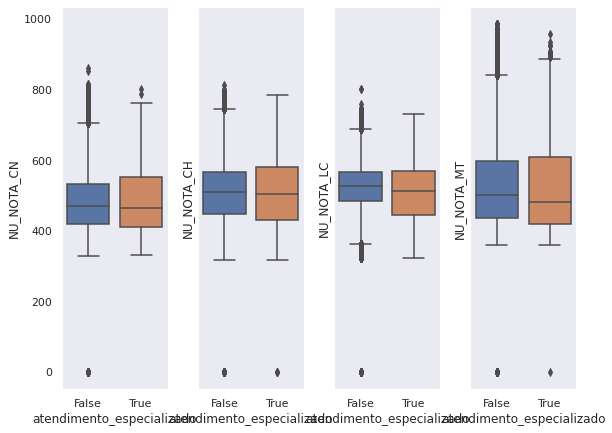

In [344]:
# Analisando as Notas x Atendimento Especializado:

sns.set_style( 'dark' ) 

figura, graficos = plt.subplots( 1 , 4 , sharey = True , figsize = ( 8 , 6 ) )

plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot( data = df_atendimento_especializado , y = coluna_1 , x = 'atendimento_especializado' , ax = graficos[i] )

In [345]:
# Criação DF com as notas e nível superior  dos pais:

df_instrucao_pais = df.loc[ : , colunas_notas + [ 'mae_possui_superior', 'pai_possui_superior' ]]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,mae_possui_superior,pai_possui_superior
0,NaN,NaN,NaN,NaN,NaN,False,False
1,543.90,527.70,545.30,513.90,680.00,False,False
2,406.10,521.20,549.20,510.50,480.00,True,True
3,520.50,488.00,549.20,599.40,500.00,False,False
4,577.10,587.00,610.70,747.00,780.00,False,False


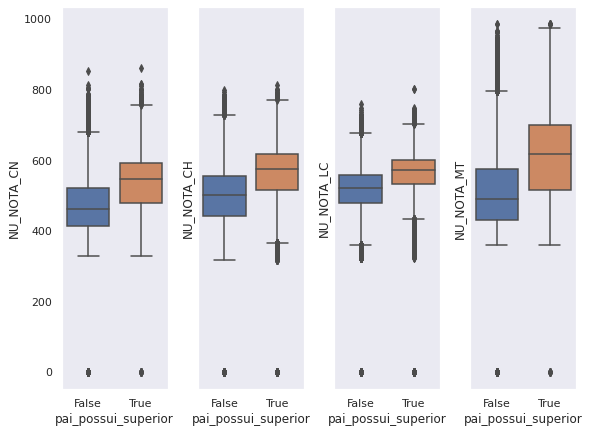

In [346]:
# Analisando as Notas x Intrução PAI:

sns.set_style( 'dark' ) 

figura, graficos = plt.subplots( 1 , 4 , sharey = True , figsize = ( 8 , 6 ) )

plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot( data = df_instrucao_pais , y = coluna_1 , x = 'pai_possui_superior' , ax = graficos[i] )

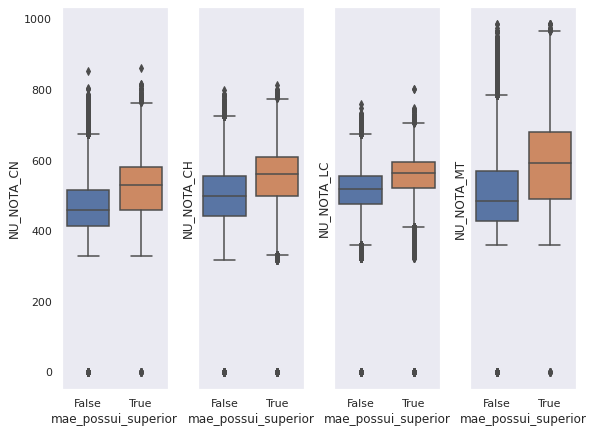

In [347]:
# Analisando as Notas x Intrução MÂE:

sns.set_style( 'dark' ) 

figura, graficos = plt.subplots( 1 , 4 , sharey = True , figsize = ( 8 , 6 ) )

plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot( data = df_instrucao_pais , y = coluna_1 , x = 'mae_possui_superior' , ax = graficos[i] )

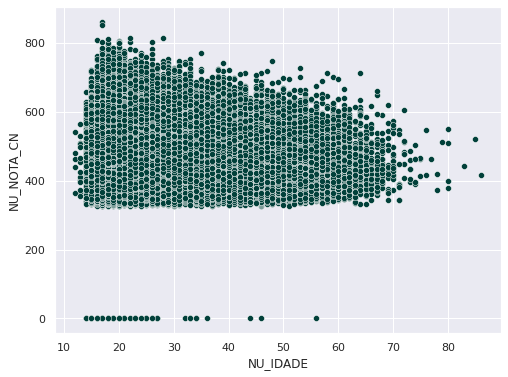

In [348]:
# Analisando correlação de idade com notas:

df_idade = df.loc[ : , colunas_notas + [ 'NU_IDADE' ] ]

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.scatterplot( data = df_idade, x = 'NU_IDADE' , y = 'NU_NOTA_CN' , color = '#01403A' )

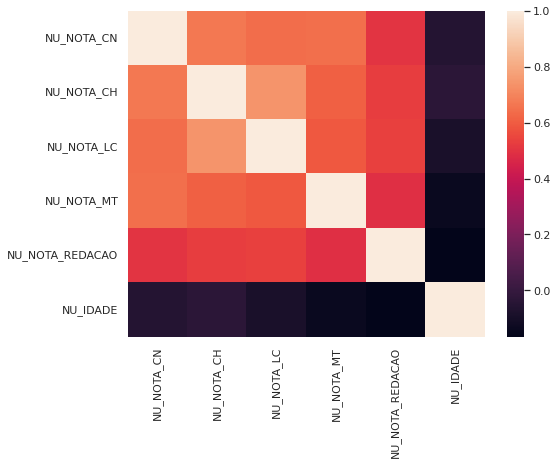

In [349]:
# Analisando correlação de pearson entre as notas e a idade:

sns.set_theme( style = 'dark' )

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

correlacoes_idade = df_idade.corr()

sns.heatmap(correlacoes_idade)

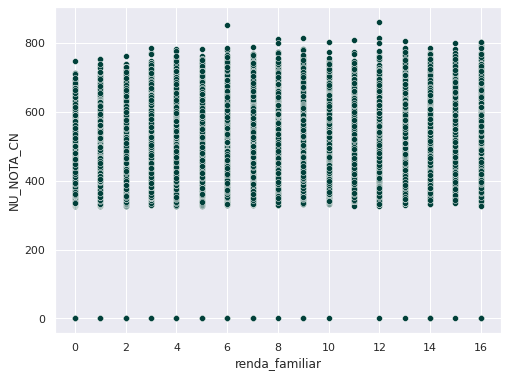

In [350]:
# Analisando a renda:

df_renda = df.loc[ : , colunas_notas + ['renda_familiar']]

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

sns.scatterplot( data = df_renda , x = 'renda_familiar' , y = 'NU_NOTA_CN' , color = '#01403A' )

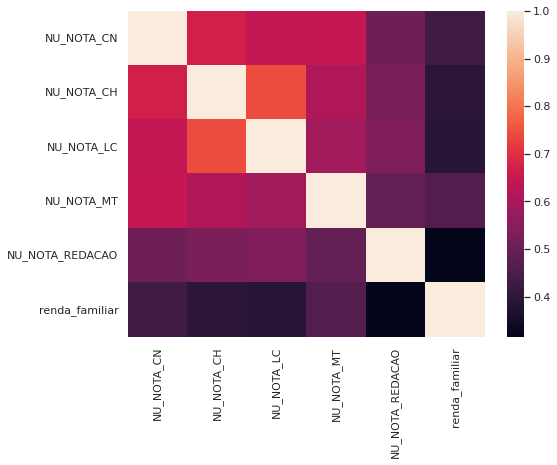

In [351]:
# Analisando correlação de pearson entre as notas e a idade:

sns.set_theme( style = 'dark' )

sns.set( rc = { 'figure.figsize' : ( 8 , 6 ) } )

correlacoes_renda = df_renda.corr()

sns.heatmap(correlacoes_renda)

# <a> Conclusões </a>

Depois de analisar os dados com o objetivo de avaliar possíveis relações entre características dos candidatos e as notas dos mesmos, podemos afirmar que existe alguma evidência de que há correlações entre as notas:

- Raça (principalmente indígenas)
- Escolaridade dos pais (notas de matemática muito influenciadas)
- Renda familiar na nota de matemática (correlação pouco acima de 0,5)

Não pudemos confirmar com essa amostra que sexo, idade, atendimento especializado tem relação com as notas.

Ficou claro que a grande maioria dos candidatos é de origem "humilde" com renda familiar inferior a R$2.000,00

O candidato "padrão" do ENEM é mulher, com 18 anos, solteira, parda, com renda familiar inferior a R$1.500,00 com ambos pai e mãe sem ensino superior completo.
